# Differentiation

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as opt
import math
import pandas as pd
import scipy
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')
from scipy import stats
import sympy as sy

### Problem 1

In [11]:
def p_1():
    x = sy.symbols('x')
    result = sy.diff((sy.sin(x)+1)**sy.sin(sy.cos(x)), x)
    return result

In [5]:
x = sy.symbols('x') #check function works
sy.diff((sy.sin(x)+1)**sy.sin(sy.cos(x)), x)

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

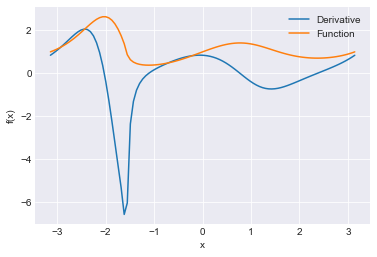

In [17]:
dom = np.linspace(-np.pi, np.pi, 100)  #set the domain
p_1_lambda = sy.lambdify(x, p_1(), "numpy") #'lambdify' the function so that it returns a numpy array
y_1 = p_1_lambda(dom) #create output

plt.plot(dom, y_1, label='Derivative')
plt.plot(dom, (np.sin(dom)+1)**np.sin(np.cos(dom)), label='Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Problem 2

In [33]:
def diff_f_1(f, x, h):
    output = (f(x+h) - f(x))/h
    return output

def diff_f_2(f, x, h):
    output = (-3*f(x) + 4*f(x+h) - f(x+2*h))/(2*h)
    return output

def diff_b_1(f, x, h):
    output = (f(x) - f(x-h))/h
    return output

def diff_b_2(f, x, h):
    output = (3*f(x) - 4*f(x-h) + f(x-2*h))/(2*h)
    return output

def diff_c_2(f, x, h):
    output = (f(x+h) - f(x-h))/(2*h)
    return output

def diff_c_4(f, x, h):
    output = (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h))/(12*h)
    return output

In [20]:
def f_2(x): #define function
    output = (np.sin(x)+1)**(np.sin(np.cos(x)))
    return output

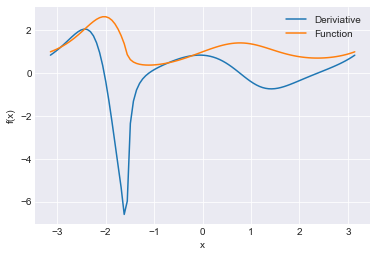

In [21]:
plt.plot(dom, diff_f_1(f_2, dom, 1e-3), label='Deriviative')
plt.plot(dom, (np.sin(dom)+1)**np.sin(np.cos(dom)), label='Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Problem 3

In [34]:
def p_3(x_0):
    domh = np.logspace(-8, 0, 9) #create log domain of h
    
    trueval = p_1_lambda(x_0) #true value  of derivative
    
    plt.plot(domh, np.abs(trueval - diff_f_1(f_2, x_0, domh)), label='Order 1 forward')
    plt.plot(domh, np.abs(trueval - diff_f_2(f_2, x_0, domh)), label='Order 2 forward')
    plt.plot(domh, np.abs(trueval - diff_b_1(f_2, x_0, domh)), label='Order 1 backward')
    plt.plot(domh, np.abs(trueval - diff_b_2(f_2, x_0, domh)), label='Order 2 backward')
    plt.plot(domh, np.abs(trueval - diff_c_2(f_2, x_0, domh)), label='Order 2 centred')
    plt.plot(domh, np.abs(trueval - diff_c_4(f_2, x_0, domh)), label='Order 4 centred')
    
    
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('h')
    plt.ylabel('Absolute error')
    plt.show()
    return

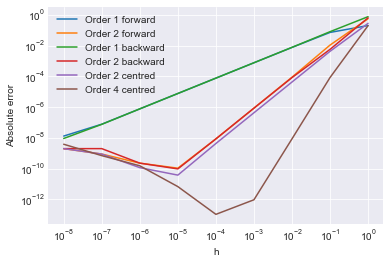

In [35]:
p_3(1.0)

### Problem 4